## Import Libraries

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [153]:
# Load data [source: https://open.toronto.ca/dataset/budget-operating-budget-program-summary-by-expenditure-category/]
df = pd.read_excel("approved-operating-budget-summary-2024.xlsx")

# Display the first few rows
print(df.head())

                      Program                           Service      Activity  \
0  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
1  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
2  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
3  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
4  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   

  Expense/Revenue                           Category Name  \
0        Expenses                                Benefits   
1        Expenses                                Benefits   
2        Expenses                                Benefits   
3        Expenses                 Contribution To Capital   
4        Expenses  Contribution To Reserves/Reserve Funds   

                        Sub-Category Name       Commitment item        2024  \
0                              Allowances   Benefits To Be Dist  10

## Clean Data

In [154]:
# Remove column 'Unnamed: 8'
df = df.drop(columns=['Unnamed: 8'])
print(df.head())

                      Program                           Service      Activity  \
0  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
1  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
2  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
3  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   
4  Arena Boards of Management  Community Ice & Facility Booking  Not assigned   

  Expense/Revenue                           Category Name  \
0        Expenses                                Benefits   
1        Expenses                                Benefits   
2        Expenses                                Benefits   
3        Expenses                 Contribution To Capital   
4        Expenses  Contribution To Reserves/Reserve Funds   

                        Sub-Category Name       Commitment item        2024  
0                              Allowances   Benefits To Be Dist  104

In [155]:
# Missing values per column
print(df.isna().sum())

Program              1372
Service              1372
Activity             1372
Expense/Revenue      1372
Category Name        1372
Sub-Category Name    1372
Commitment item      1372
2024                 1372
dtype: int64


In [156]:
# Rows with missing values
print(df[df.isna().any(axis=1)])

      Program Service Activity Expense/Revenue Category Name  \
18585     NaN     NaN      NaN             NaN           NaN   
18586     NaN     NaN      NaN             NaN           NaN   
18587     NaN     NaN      NaN             NaN           NaN   
18588     NaN     NaN      NaN             NaN           NaN   
18589     NaN     NaN      NaN             NaN           NaN   
...       ...     ...      ...             ...           ...   
19952     NaN     NaN      NaN             NaN           NaN   
19953     NaN     NaN      NaN             NaN           NaN   
19954     NaN     NaN      NaN             NaN           NaN   
19955     NaN     NaN      NaN             NaN           NaN   
19956     NaN     NaN      NaN             NaN           NaN   

      Sub-Category Name Commitment item  2024  
18585               NaN             NaN   NaN  
18586               NaN             NaN   NaN  
18587               NaN             NaN   NaN  
18588               NaN             NaN

In [157]:
# Drop rows with any NaN values
df_cleaned = df.dropna()

In [158]:
# Show number of rows and columns before removing missing values
rows, cols = df.shape
print(f"Number of rows before: {rows}")
print(f"Number of columns before: {cols}")


# Show number of rows and columns after removing missing values
rows, cols = df_cleaned.shape
print(f"Number of rows after: {rows}")
print(f"Number of columns after: {cols}")

Number of rows before: 19957
Number of columns before: 8
Number of rows after: 18585
Number of columns after: 8


In [159]:
# Check if there are any duplicates
has_duplicates = df_cleaned.duplicated().any()
print(has_duplicates)

True


In [160]:
# Check number of duplicate rows
num_duplicates = df_cleaned.duplicated().sum()
print(num_duplicates)

78


In [161]:
# Show some duplicates (Check data source for more context on duplicates)
duplicates = df_cleaned[df_cleaned.duplicated()]
print(duplicates.head())

             Program                Service               Activity  \
15367  Toronto Water  Stormwater Management  Stormwater Collection   
15373  Toronto Water  Stormwater Management  Stormwater Collection   
15375  Toronto Water  Stormwater Management  Stormwater Collection   
15514  Toronto Water  Stormwater Management  Stormwater Collection   
15538  Toronto Water  Stormwater Management  Stormwater Collection   

      Expense/Revenue             Category Name         Sub-Category Name  \
15367        Expenses  Inter-Divisional Charges  Inter-Divisional Charges   
15373        Expenses  Inter-Divisional Charges  Inter-Divisional Charges   
15375        Expenses  Inter-Divisional Charges  Inter-Divisional Charges   
15514        Expenses          Service And Rent       Contracted Services   
15538        Expenses          Service And Rent       Contracted Services   

            Commitment item       2024  
15367    IDC-Fac Maint Svcs  386712.22  
15373     IDC-Flt Misc Chgs   9499

In [162]:
# Remove duplicate rows (keeping the first occurrence)
df_cleaned2 = df_cleaned.drop_duplicates()

# Show number of rows and columns before removing duplicate values
rows, cols = df_cleaned.shape
print(f"Number of rows before: {rows}")
print(f"Number of columns before: {cols}")


# Show number of rows and columns after removing duplicate values
rows, cols = df_cleaned2.shape
print(f"Number of rows after: {rows}")
print(f"Number of columns after: {cols}")

Number of rows before: 18585
Number of columns before: 8
Number of rows after: 18507
Number of columns after: 8


## Perform Exploratory Data Analysis (EDA)

In [163]:
### Find how much revenue and expense each program costs

# Group by 'Program' and 'Expense/Revenue' and get the sum of '2024'
grouped = df_cleaned2.groupby(['Program', 'Expense/Revenue']).sum()

print(grouped['2024'])

Program                           Expense/Revenue
Arena Boards of Management        Expenses           1.079258e+07
                                  Revenues          -1.003086e+07
Association of Community Centres  Expenses           1.156222e+07
                                  Revenues          -3.316107e+05
Auditor General's Office          Expenses           7.991143e+06
                                                         ...     
Transit Expansion                 Revenues          -9.040658e+06
Transportation Services           Expenses           4.808558e+08
                                  Revenues          -2.268704e+08
Yonge-Dundas Square               Expenses           3.684921e+06
                                  Revenues          -2.175000e+06
Name: 2024, Length: 113, dtype: float64


In [164]:
### Total profit / loss for each program

# Group by 'Program' and get the sum
program_totals = df_cleaned2.groupby('Program')['2024'].sum()

print(program_totals)

Program
Arena Boards of Management                             7.617211e+05
Association of Community Centres                       1.123061e+07
Auditor General's Office                               7.991143e+06
Capital & Corporate Financing                          8.841746e+08
Children's Services                                    9.362196e+07
City Clerk's Office                                    3.674999e+07
City Council                                           2.536767e+07
City Manager's Office                                  6.566414e+07
City Planning                                          9.951009e+06
Corporate Real Estate Management                       1.215353e+08
Court Services                                        -6.193280e+07
CreateTO                                              -9.313226e-10
Customer Experience                                    1.452042e+07
Economic Development & Culture                         8.301550e+07
Engineering & Construction Services     

In [165]:
# Find programs with the highest revenue / loss

highest_revenue_program = program_totals.idxmax()
highest_revenue = program_totals.max()

highest_loss_program = program_totals.idxmin()
highest_loss = program_totals.min()

print(f"The program with the highest revenue is {highest_revenue_program} with a total of {highest_revenue}.")
print(f"The program with the highest loss is {highest_loss_program} with a total of {highest_loss}.")

The program with the highest revenue is Toronto Police Service with a total of 1173914500.1100001.
The program with the highest loss is Non-Program Taxation Tax Levy with a total of -5303919155.299999.


In [166]:
# Find total revenue and total expenses
grouped_sums = df_cleaned2.groupby('Expense/Revenue')['2024'].sum()

print(grouped_sums)

Expense/Revenue
Expenses    1.638039e+10
Revenues   -1.747332e+10
Name: 2024, dtype: float64


In [167]:
### Total surplus / deficit for the entire budget

# Sum the values in column '2024'
sum_2024 = df['2024'].sum()

print(f"Toronto 2024 budget surplus / deficit: {sum_2024}")

Toronto 2024 budget surplus / deficit: -1087830164.08


## Data Visualization

In [168]:
# Group by 'Program' and 'Expense/Revenue' and sum '2024'
grouped = df_cleaned2.groupby(['Program', 'Expense/Revenue'])['2024'].sum().reset_index()

# Sort by '2024' and then filter
top_10_expenses = grouped[grouped['Expense/Revenue'] == 'Expenses'].sort_values(by=['2024'], ascending=False).head(10)
top_10_revenues = grouped[grouped['Expense/Revenue'] == 'Revenues'].sort_values(by=['2024'], ascending=True).head(10)

print(top_10_expenses.head())
print(top_10_revenues.head())

                                      Program Expense/Revenue          2024
99  Toronto Transit Commission - Conventional        Expenses  2.404370e+09
89                     Toronto Police Service        Expenses  1.361500e+09
5               Capital & Corporate Financing        Expenses  1.215034e+09
83       Toronto Employment & Social Services        Expenses  1.197631e+09
7                         Children's Services        Expenses  1.103486e+09
                                       Program Expense/Revenue          2024
53               Non-Program Taxation Tax Levy        Revenues -5.658715e+09
51                        Non-Program Revenues        Revenues -2.367363e+09
104                              Toronto Water        Revenues -1.547305e+09
100  Toronto Transit Commission - Conventional        Revenues -1.328770e+09
84        Toronto Employment & Social Services        Revenues -1.117134e+09


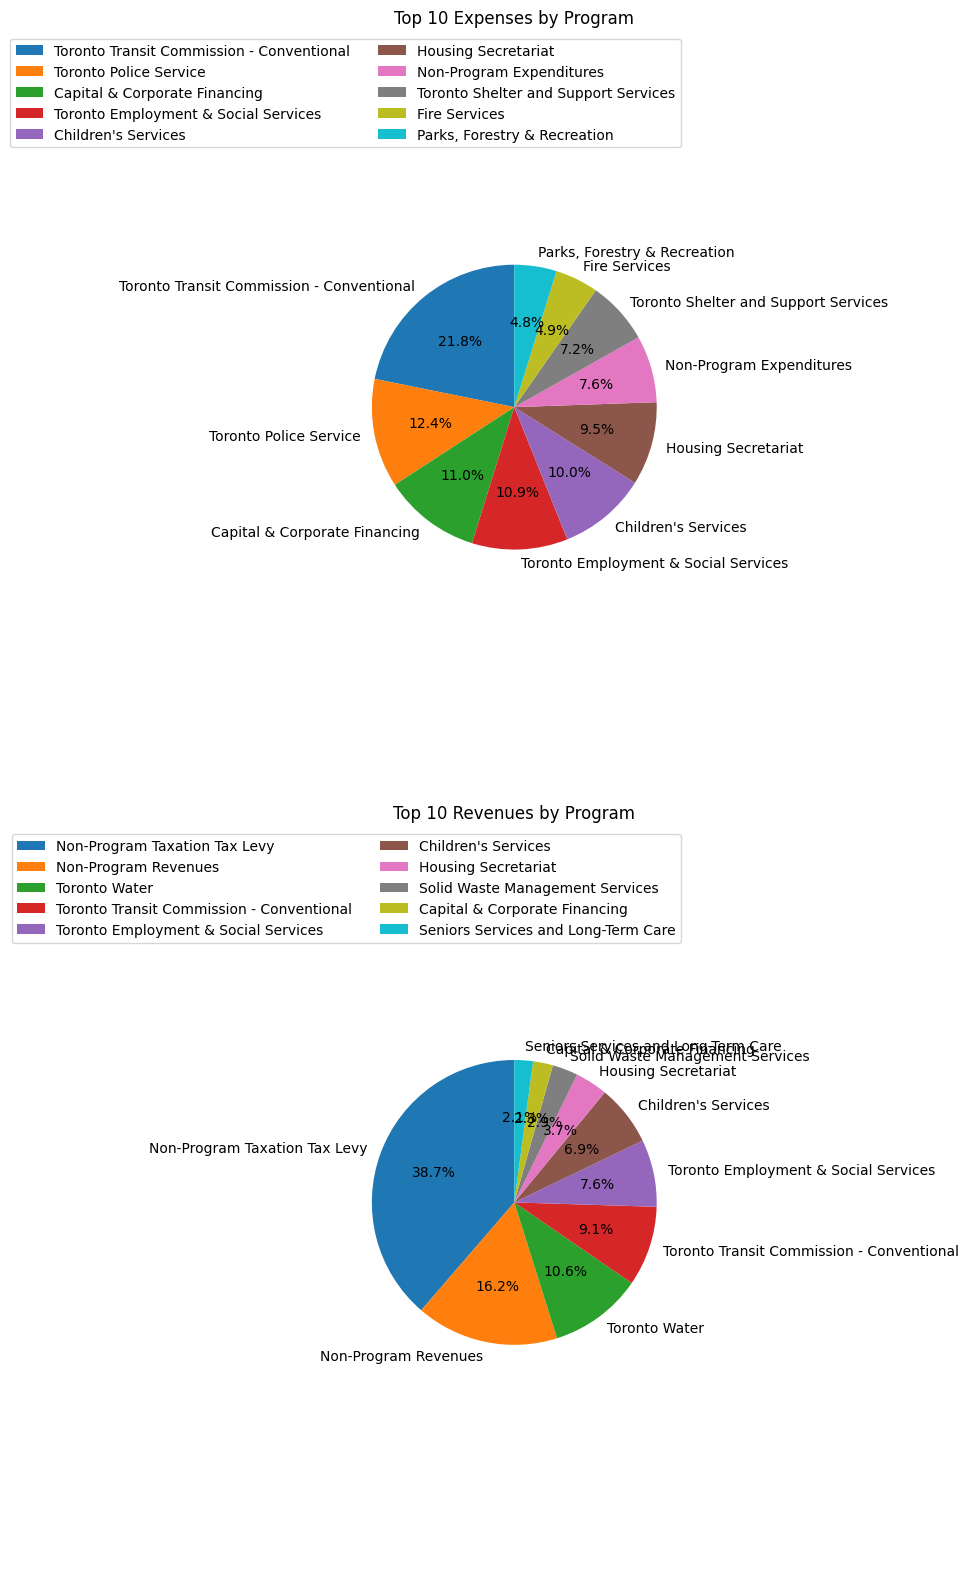

In [169]:
# Create subplots for expenses and revenues
fig, axes = plt.subplots(2, 1, figsize=(8, 16))

# Plot expenses pie chart
axes[0].pie(top_10_expenses['2024'], labels=top_10_expenses['Program'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Top 10 Expenses by Program')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot revenues pie chart
axes[1].pie(abs(top_10_revenues['2024']), labels=top_10_revenues['Program'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 10 Revenues by Program')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend outside the pie charts
axes[0].legend(ncol=2)
axes[1].legend(ncol=2)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()